In [1]:
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
#from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gsw as gsw
import cmocean as cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
#this is the 2013v2 woa data from https://www.nodc.noaa.gov/OC5/woa13/woa13data.html
#units are ml/l
nc = Dataset('/g/data/v45/pas561/mom/archive/bgc_obs/woa13_all_o00_01.nc', mode='r') # file handle, open in read only mode
#note lon goes from -180 to 180
woa2_lon = nc.variables['lon'][:]
woa2_lat = nc.variables['lat'][:]
woa2_depth = nc.variables['depth'][:]
woa2_oxy = nc.variables['o_an'][:]
nc.close() # close the file

print woa2_oxy.shape

#model data is in mmol/m3

#convert  ml/l to mmol/m3
#1 μmol O2 = .022391 ml
#1 ml/l = 103/22.391 = 44.661 μmol/l

#ml/L/44.661= μmol/L*1000L/m3=umol/m3/1000=mmol/m3
woa2_oxy=woa2_oxy*44.661

(1, 102, 180, 360)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/ma/core.py:1019: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


Text(0.5,1,'WOA Oxygen')

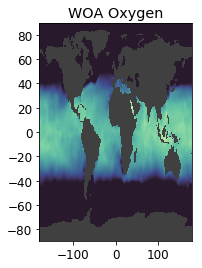

In [3]:
plt.rcParams['font.size'] = 12
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(180,271,1)
clev3=np.arange(180,280,10)

tmp=np.squeeze(woa2_oxy[0,0,:,:])
tmp.shape

plt.subplot(1,2,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(woa2_lon,woa2_lat,tmp,cmap=cm.cm.deep,levels=clev,extend='both')
plt.title('WOA Oxygen')

[-0.5]
[0.5]
(102, 90)
[0.5]
(102, 90)


Text(0.5,1,'WOA Oxygen mmol/m3 at 0.5')

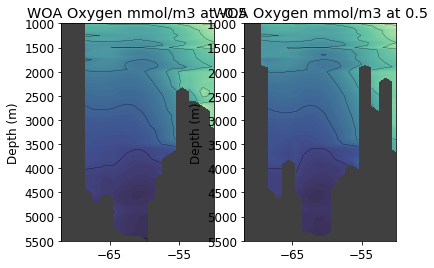

In [4]:
clev = np.arange(180,271,1)
clev3=np.arange(180,280,10)

print woa2_lon[np.argwhere(woa2_lon<0)[-1]]
print woa2_lon[np.argwhere(woa2_lon>0)[0]]
var1=np.squeeze(woa2_oxy[0,:,0:90,np.argwhere(woa2_lon<0)[-1]])
print var1.shape

plt.subplot(1,2,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=cm.cm.deep,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Oxygen mmol/m3 at -0.5')

print woa2_lon[np.argwhere(woa2_lon>0)[0]]
var1=np.squeeze(woa2_oxy[0,:,0:90,np.argwhere(woa2_lon>0)[0]])
print var1.shape

plt.subplot(1,2,2)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=cm.cm.deep,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Oxygen mmol/m3 at 0.5')

Text(0.5,1,'WOA Oxygen Mask -0.5')

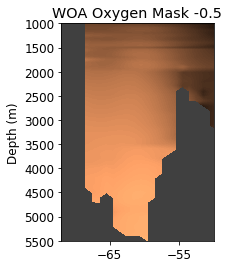

In [5]:
#woa2_msk=np.squeeze(woa2_oxy[0,:,:,np.argwhere(woa2_lon<0)[-1]])
#print woa2_msk.shape

var1=np.squeeze(woa2_oxy[0,:,:,np.argwhere(woa2_lon<0)[-1]])

#woa2_msk=np.zeros((tmp.shape[0],tmp.shape[1]),dtype=float)
#woa2_msk.fill(1)
#woa2_msk[np.where(tmp>0)]=np.nan

#woa2_msk=np.zeros((tmp.shape[0],tmp.shape[1]),dtype=float)
#woa2_msk.fill(1)
#woa2_msk[np.where(tmp>0)]=np.nan
#print woa2_msk.shape

#m = np.ma.masked_where(y>2, y)

plt.subplot(1,2,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Oxygen Mask -0.5')

In [6]:
#var1.shape
tmp=numpy.ma.masked_array(numpy.logical_not(var1.mask))

In [7]:
#var1[0,:].mask

In [8]:
#tmp[0,:]

In [9]:
woa2_msk=np.zeros((var1.shape[0],var1.shape[1]),dtype=float)
woa2_msk.fill(1)
woa2_msk[np.where(numpy.logical_not(var1.mask))]=np.nan
print woa2_msk.shape

(102, 180)


In [10]:
#woa2_msk[0,:]

In [11]:
#var1[0,:]

In [12]:
#woa13 on model grid with no nans
nc = Dataset('/g/data/v45/pas561/mom/archive/WOA/woa13_mom025_ocean_temp_salt.res.nc', mode='r') # file handle, open in read only mode
woa_xt = nc.variables['GRID_X_T'][:]
woa_yt = nc.variables['GRID_Y_T'][:]
woa_zt = nc.variables['ZT'][:]
woa_temp = nc.variables['temp'][:]
woa_salt = nc.variables['salt'][:]
nc.close() # close the file

print woa_salt.shape, woa_temp.shape, woa_xt.shape, woa_yt.shape, woa_zt.shape

woa_temp=np.squeeze(woa_temp)
woa_salt=np.squeeze(woa_salt)

print woa_salt.shape, woa_temp.shape

(1, 50, 1080, 1440) (1, 50, 1080, 1440) (1440,) (1080,) (50,)
(50, 1080, 1440) (50, 1080, 1440)


In [13]:
print woa2_msk.shape, woa2_depth.shape, woa2_lat.shape

(102, 180) (102,) (180,)


In [14]:
woa_x2=np.argwhere(woa_xt<0)
woa_x2=woa_x2[-1]
print woa_xt[woa_x2]

[-0.125]


In [15]:
woa_rho2=gsw.sigma2(np.squeeze(woa_salt[:,0:500,woa_x2]),np.squeeze(woa_temp[:,0:500,woa_x2]))
print woa_rho2.shape
var1= woa_rho2

(50, 500)


In [16]:
#defs from https://royalsocietypublishing.org/doi/pdf/10.1098/rsta.2013.0041
wsdw_salt=34.660
wsdw_temp=-0.380

wsbw_temp=-0.770
wsbw_salt=34.648

wsbw_rho2=gsw.sigma2(wsbw_salt,wsbw_temp)
wsdw_rho2=gsw.sigma2(wsdw_salt,wsdw_temp)
print wsbw_rho2, wsdw_rho2 

37.09624939476839 37.06460377298208


(50, 500)
[-0.5]


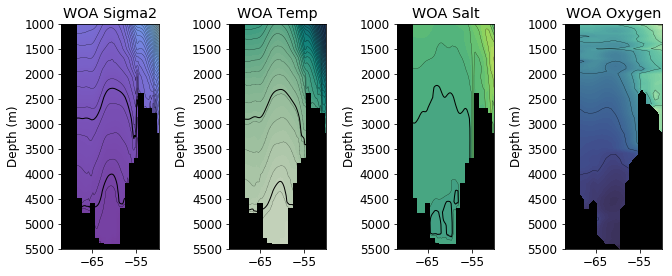

In [17]:
plt.rcParams['font.size'] = 12
plt.figure(figsize(9.5,4))

var1= woa_rho2

clev = np.arange(36.7,37.302,.002)
clev3=np.arange(36.7,37.31,.01)
tick_lvls = np.arange(36.7, 37.4, .1)

plt.subplot(1,4,1)
plt.gca().patch.set_color('0')

p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.dense,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_rho2],linestyles='solid',colors='k',linewidths=1.0)

p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)

#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Sigma2')

var1=np.squeeze(woa_temp[:,0:500,woa_x2])

clev = np.arange(-1.5,2.5,.05)
clev3=np.arange(-1.5,2.5,.1)

plt.subplot(1,4,2)
plt.gca().patch.set_color('0')
p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.tempo,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)
p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)
#p2=plt.contourf(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_temp],linestyles='solid',colors='k',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Temp')


clev = np.arange(34.45,34.81,.01)
clev3=np.arange(34.45,34.82,.02)
tick_lvls = np.arange(34.4, 34.8, .05)

var1=np.squeeze(woa_salt[:,0:500,woa_x2])
print var1.shape

plt.subplot(1,4,3)
plt.gca().patch.set_color('0')
p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.haline,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)
#p2=plt.contourf(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_salt],linestyles='solid',colors='k',linewidths=1.0)

p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Salt')

clev = np.arange(180,271,1)
clev3=np.arange(180,280,10)

print woa2_lon[np.argwhere(woa2_lon<0)[-1]]
var1=np.squeeze(woa2_oxy[0,:,:,np.argwhere(woa2_lon<0)[-1]])

plt.subplot(1,4,4)
plt.gca().patch.set_color('0')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1[:,0:90],cmap=cm.cm.deep,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1[:,0:90],levels=clev3,colors='k',linewidths=0.25)
#p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('WOA Oxygen')

plt.tight_layout()

In [18]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc'
vgrid_file ='/g/data/v45/pas561/mom/archive/wombat_jun16z/output1981/ocean__1980_07.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

fh=fcor/ht
print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape

(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [19]:
NP_CntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean__*.nc')
print Ocean_File
np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print np_cntrl.temp.shape

/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output197*/ocean__*.nc
(9, 50, 1080, 1440)


In [20]:
np_x2=np.argwhere(xt_ocean<-0.25)
np_x2=np_x2[-1]
print xt_ocean[np_x2]

[-0.375]


In [21]:
np_cntrl_temp=np.squeeze(np_cntrl.temp[0:9,:,0:500,np_x2].mean('time').load())
np_cntrl_salt=np.squeeze(np_cntrl.salt[0:9,:,0:500,np_x2].mean('time').load())

np_cntrl_rho2=gsw.sigma2(np_cntrl_salt,np_cntrl_temp)
np_cntrl_rho2.shape

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/gsw/gibbs/density_enthalpy_48.py:814: RuntimeWarning: invalid value encountered in maximum
  SA = np.maximum(SA, 0)


(50, 500)

In [22]:
NP_CntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean_bgc_carbon*.nc')
print Ocean_File
np_cntrl_bgc=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print np_cntrl_bgc.o2.shape

np_cntrl_o2=np.squeeze(np_cntrl_bgc.o2[0:60,:,0:500,np_x2].mean('time').load())

/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output197*/ocean_bgc_carbon*.nc
(108, 50, 1080, 1440)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


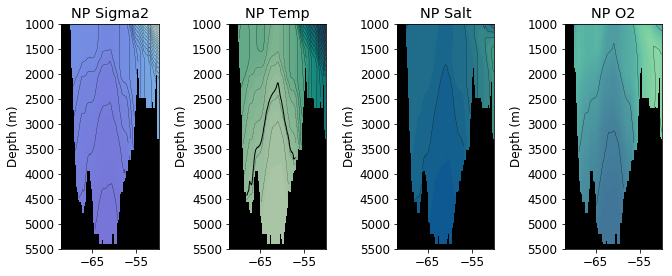

In [23]:
plt.rcParams['font.size'] = 12
plt.figure(figsize(9.5,4))

var1=np_cntrl_rho2[25:,0:500]

clev = np.arange(36.7,37.302,.002)
clev3=np.arange(36.7,37.31,.01)
tick_lvls = np.arange(36.7, 37.4, .1)

plt.subplot(1,4,1)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.dense,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_rho2],linestyles='solid',colors='r',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('NP Sigma2')


var1=np_cntrl_temp[25:,0:500]

clev = np.arange(-1.5,2.5,.05)
clev3=np.arange(-1.5,2.5,.1)

plt.subplot(1,4,2)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.tempo,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_temp],linestyles='solid',colors='r',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('NP Temp')

var1=np_cntrl_salt[25:,0:500]

clev = np.arange(34.45,34.81,.01)
clev3=np.arange(34.45,34.82,.02)
tick_lvls = np.arange(34.4, 34.8, .05)

plt.subplot(1,4,3)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.haline,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_salt],linestyles='solid',colors='r',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('NP Salt')

var1=np_cntrl_o2[25:,0:500]

clev = np.arange(180,271,1)
clev3=np.arange(180,280,10)

plt.subplot(1,4,4)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.deep,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('NP O2')

plt.tight_layout()

In [24]:
Ocean_File = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_1*.nc'
print Ocean_File
mom01_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print mom01_cntrl.temp.shape

/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_1*.nc
(41, 75, 1351, 3600)


In [25]:
vgrid_file ='/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_114.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
mom01_st = nc.variables['st_ocean'][:]
mom01_yt = nc.variables['yt_ocean'][:]
mom01_xt = nc.variables['xt_ocean'][:]
#potrho = nc.variables['potrho'][:]
#dzt = nc.variables['dzt'][:]
nc.close() # close the 
print mom01_xt.shape
print mom01_st.shape
print mom01_yt.shape

(3600,)
(75,)
(1351,)


In [26]:
mom01_x2=np.argwhere(mom01_xt<-0.3)
mom01_x2=mom01_x2[-1]
print mom01_x2, mom01_xt[mom01_x2]

[2796] [-0.35]


In [27]:
mom01_x2

array([2796])

In [28]:
t1=0 #3:7 for non annual means
t2=1
mom01_cntrl_salt=np.squeeze(mom01_cntrl.salt[t1:t2,:,0:1000,mom01_x2].mean('time').load())
mom01_cntrl_temp=np.squeeze(mom01_cntrl.temp[t1:t2,:,0:1000,mom01_x2].mean('time').load())

mom01_cntrl_rho2=gsw.sigma2(mom01_cntrl_salt,mom01_cntrl_temp)
mom01_cntrl_rho2.shape

(75, 1000)

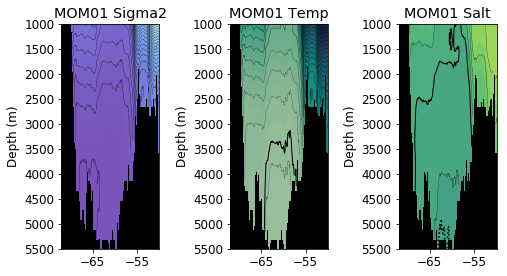

In [29]:
plt.rcParams['font.size'] = 12
plt.figure(figsize(9.5,4))

var1=mom01_cntrl_rho2
#print var1.shape, mom01_yt.shape, mom01_st.shape

clev = np.arange(36.7,37.302,.002)
clev3=np.arange(36.7,37.31,.01)
tick_lvls = np.arange(36.7, 37.4, .1)

plt.subplot(1,4,1)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.dense,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_rho2],linestyles='solid',colors='k',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('MOM01 Sigma2')

var1=mom01_cntrl_temp

clev = np.arange(-1.5,2.5,.05)
clev3=np.arange(-1.5,2.5,.1)

plt.subplot(1,4,2)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.tempo,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_temp],linestyles='solid',colors='k',linewidths=1.0)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('MOM01 Temp')

var1=mom01_cntrl_salt

clev = np.arange(34.45,34.81,.01)
clev3=np.arange(34.45,34.82,.02)
tick_lvls = np.arange(34.4, 34.8, .05)

plt.subplot(1,4,3)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.haline,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_salt],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('MOM01 Salt')

plt.tight_layout()

(50, 500)
[-0.5]


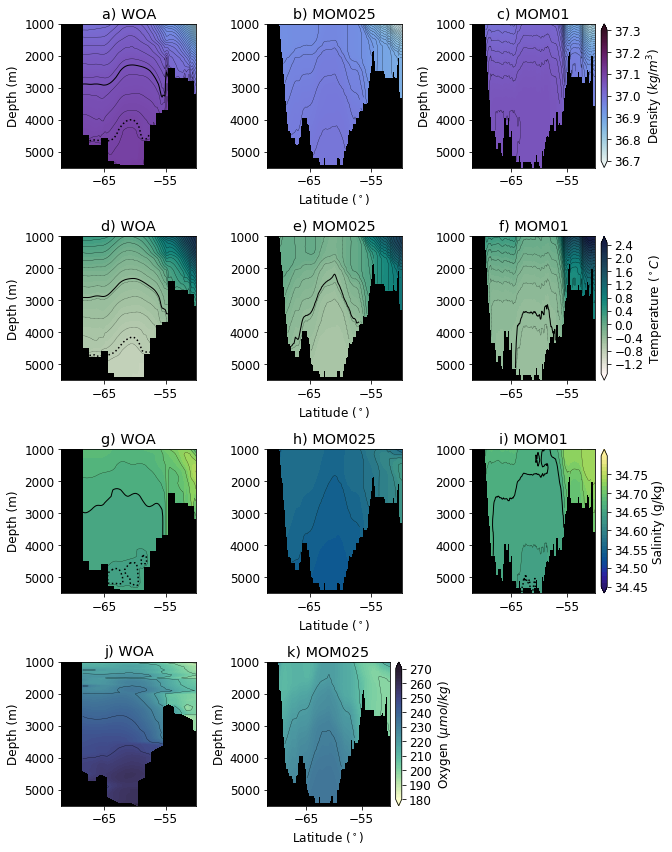

In [32]:
plt.rcParams['font.size'] = 12

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

var1= woa_rho2

clev = np.arange(36.7,37.302,.002)
clev3=np.arange(36.7,37.31,.01)
tick_lvls = np.arange(36.7, 37.4, .1)

plt.subplot(4,3,1)
plt.gca().patch.set_color('0')

p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.dense,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_rho2],linestyles='dotted',colors='k',linewidths=1.5)

p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)

#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('a) WOA')

var1=np_cntrl_rho2[25:,0:500]

plt.subplot(4,3,2)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.dense,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_rho2],linestyles='dotted',colors='r',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('b) MOM025')

var1=mom01_cntrl_rho2

plt.subplot(4,3,3)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.dense,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_rho2],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_rho2],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('c) MOM01')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
#cb.ax.set_xlabel('$kg/m^3$')
cb.ax.set_ylabel('Density ($kg/m^3$)')


var1=np.squeeze(woa_temp[:,0:500,woa_x2])

clev = np.arange(-1.5,2.5,.05)
clev3=np.arange(-1.5,2.5,.1)

plt.subplot(4,3,4)
plt.gca().patch.set_color('0')
p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.tempo,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)
p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)
#p2=plt.contourf(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_temp],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('d) WOA')

var1=np_cntrl_temp[25:,0:500]

plt.subplot(4,3,5)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.tempo,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_temp],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('e) MOM025')

var1=mom01_cntrl_temp

plt.subplot(4,3,6)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.tempo,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_temp],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_temp],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('f) MOM01')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical')
#cb.ax.set_xlabel('$^\circ C$')
cb.ax.set_ylabel('Temperature ($^\circ C$)')

clev = np.arange(34.45,34.81,.01)
clev3=np.arange(34.45,34.82,.02)
tick_lvls = np.arange(34.4, 34.8, .05)

var1=np.squeeze(woa_salt[:,0:500,woa_x2])
print var1.shape

plt.subplot(4,3,7)
plt.gca().patch.set_color('0')
p1=plt.contourf(woa_yt[0:500],woa_zt,var1,cmap=cm.cm.haline,levels=clev,extend='both')
plt.contour(woa_yt[0:500],woa_zt,var1,levels=clev3,colors='k',linewidths=0.25)
#p2=plt.contourf(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')

pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(woa_yt[0:500],woa_zt,var1,levels=[wsbw_salt],linestyles='dotted',colors='k',linewidths=1.5)

p2=plt.pcolormesh(woa2_lat[0:90],woa2_depth,woa2_msk[:,0:90],cmap=plt.cm.copper)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('g) WOA')

var1=np_cntrl_salt[25:,0:500]

plt.subplot(4,3,8)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.haline,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=[wsbw_salt],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('h) MOM025')

var1=mom01_cntrl_salt

plt.subplot(4,3,9)
plt.gca().patch.set_color('0')

p1=plt.contourf(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],cmap=cm.cm.haline,levels=clev,extend='both') #,levels=clev
plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=clev3,colors='k',linewidths=0.25)

pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsdw_salt],linestyles='solid',colors='k',linewidths=1.0)
pr=plt.contour(mom01_yt[0:1000],mom01_st[25:],var1[25:,0:1000],levels=[wsbw_salt],linestyles='dotted',colors='k',linewidths=1.5)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('i) MOM01')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
#cb.ax.set_xlabel('g/kg')
cb.ax.set_ylabel('Salinity (g/kg)')

clev = np.arange(180,271,1)
clev3=np.arange(180,280,10)

print woa2_lon[np.argwhere(woa2_lon<0)[-1]]
var1=np.squeeze(woa2_oxy[0,:,:,np.argwhere(woa2_lon<0)[-1]])

plt.subplot(4,3,10)
plt.gca().patch.set_color('0')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1[:,0:90],cmap=cm.cm.deep,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1[:,0:90],levels=clev3,colors='k',linewidths=0.25)
#p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1[:,0:90],cmap=plt.cm.copper,levels=clev,extend='both')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('j) WOA')

var1=np_cntrl_o2[25:,0:500]

plt.subplot(4,3,11)
plt.gca().patch.set_color('0')

p1=plt.contourf(yt_ocean[0:500],st_ocean[25:],var1,cmap=cm.cm.deep,levels=clev,extend='both') #,levels=clev
plt.contour(yt_ocean[0:500],st_ocean[25:],var1,levels=clev3,colors='k',linewidths=0.25)

plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$)')
plt.ylim((5500,1000))
plt.xlim([-72,-50])
plt.xticks([-65,-55])
plt.title('k) MOM025')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical')
#cb.ax.set_xlabel('      ')
cb.ax.set_ylabel('Oxygen ($\mu mol/kg$)')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig1_TS_02_WOA_0W_all.png'
plt.savefig(of,dpi=220)